In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/신용카드 사기거래 탐지/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/신용카드 사기거래 탐지/test.csv')
val = pd.read_csv('/content/drive/MyDrive/데이콘/신용카드 사기거래 탐지/val.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


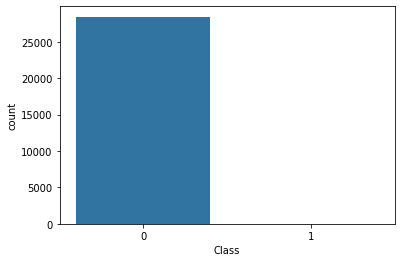

0    28432
1       30
Name: Class, dtype: int64


In [ ]:
sns.countplot(val.Class)
plt.show()
print(val.Class.value_counts())

In [ ]:
Fraud = val[val['Class']==1]

Valid = val[val['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases :', len(Fraud))
print('valid Cases :', len(Valid))

0.0010551491277433877
Fraud Cases : 30
valid Cases : 28432


In [ ]:
train_x = train.drop(columns=['ID']) # Input Data
val_x = val.drop(columns=['ID', 'Class']) # Input Data
val_y = val['Class'] # Label
test_x = test.drop(columns=['ID'])

In [ ]:
Fraud = val[val['Class']==1]
Valid = val[val['Class']==0]

# 거래사기비율
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0010551491277433877


In [ ]:
PercFraud = outlier_fraction

cov = EllipticEnvelope(support_fraction = 0.994, contamination = PercFraud)
#y_pred = cov.fit_predict(train_x)

In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [ ]:
y_pred = cov.fit(train_x)

In [ ]:
val_y = val_y.values.reshape(-1,1)

In [ ]:
y_pred = cov.predict(val_x)

In [ ]:
y_pred = get_pred_label(y_pred)

In [ ]:
f1 = f1_score(val_y, y_pred, average='macro')
print("F1 score", f1)

F1 score 0.8927516353661109


In [ ]:
test_pred = cov.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/데이콘/신용카드 사기거래 탐지/sample_submission.csv')
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [ ]:
submit['Class'] = test_pred
submit.to_csv('220708.csv', index=False)

In [ ]:
submit.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0
